In [1]:
from functools import partial

In [2]:
import numpy as np

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.xmargin'] = 0.05
mpl.rcParams['axes.ymargin'] = 0.05
mpl.rcParams['axes.labelsize'] = 24
mpl.rcParams['axes.titlesize'] = 24

mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

In [4]:
from lio.utils.plot import simplex

---

In [5]:
# simplex grid
n = 100
p = np.array(simplex.grid(3, n)) / n
p = p[(p > 0).all(1)]

In [6]:
# transition matrix
I = np.eye(3)
U = np.array([
    [.70, .25, .05],
    [.15, .60, .25],
    [.05, .15, .80],
])
V = np.array([
    [.90, .05, .05],
    [.15, .80, .05],
    [.00, .10, .90],
])
T = U @ V

In [7]:
T_ = np.array([
    T[0],
    [0.0, 0.8, 0.2],
    [0.3, 0.0, 0.7],
])

In [8]:
pi = np.array([[0.80, 0.15, 0.05]])
qi = pi @ T

In [9]:
def linear(c, p):
    return c * p + (1 - c) * 1 / 3

def power(c, p):
    return (p ** c) / (p ** c).sum(1, keepdims=True)

def kl(p, q):
    return (p * np.log(p / q)).sum(1)

In [10]:
cs = np.linspace(0, 1, 100)

c_lin = cs[np.array([kl(qi, linear(c, pi)) for c in cs]).argmin()]
c_pow = cs[np.array([kl(qi, power(c, pi)) for c in cs]).argmin()]
c_lin, c_pow

(0.5454545454545455, 0.4646464646464647)

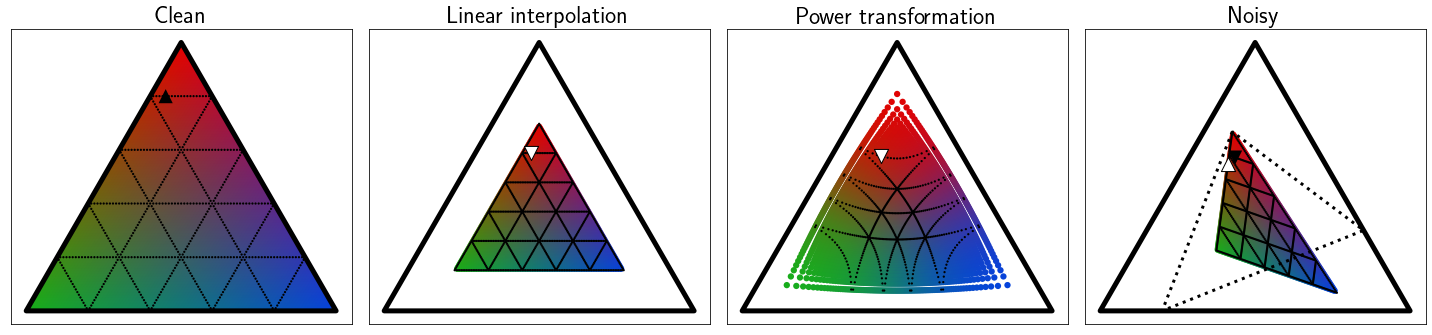

In [11]:
grid = np.array([g for g in simplex.grid(3, 100) if (g[0] % 20 == 0 or 
                                                     g[1] % 20 == 0 or 
                                                     g[2] % 20 == 0)]) / 100

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
for ax, (title, trans) in zip(
    axes,
    [
        ('Clean', lambda p: p),
        ('Linear interpolation', partial(linear, c_lin)),
        ('Power transformation', partial(power, c_pow)),
        ('Noisy', lambda p: p @ T),
     ]
):
    ax.set_title(title)
    simplex.init(ax)
    simplex.scatter(ax, trans(p), color=p @ simplex.Tc)
    simplex.scatter(ax, trans(grid), c='k', s=5)
    simplex.boundary(ax)

s = 200
simplex.scatter(axes[0], pi, marker='^', color='k', s=s)
simplex.scatter(axes[1], linear(c_lin, pi), marker='v', color='w', edgecolor='k', linewidth=1, s=s)
simplex.scatter(axes[2], power(c_pow, pi), marker='v', color='w', edgecolor='k', linewidth=1, s=s)
simplex.scatter(axes[3], qi, marker='v', color='k', s=s)
simplex.scatter(axes[3], pi @ T_, marker='^', color='w', edgecolor='k', linewidth=1, s=s)
simplex.polygon(axes[3], T_, linestyle='dotted', edgecolors='k')

fig.tight_layout()
fig.subplots_adjust(wspace=0.05)
fig.savefig('plot/noise_approx.pdf', dpi=100, bbox_inches='tight')

---

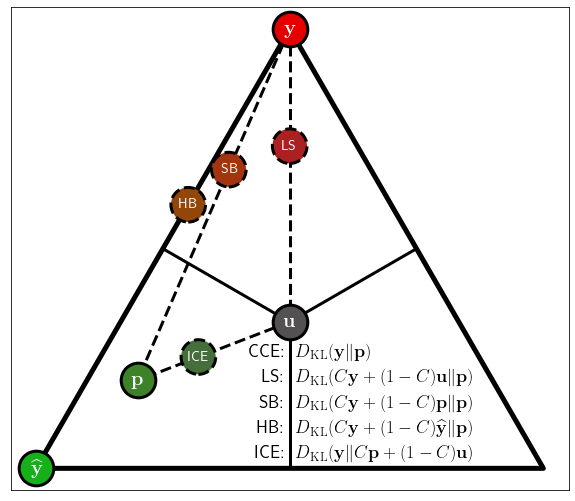

In [12]:
c = 0.6
s = 1200

y = np.array([1, 0, 0])
p = np.array([0.2, 0.7, 0.1])
y_ = np.array([0, 1, 0])
u = np.ones(3) / 3  # uniform
m = (np.ones([3, 3]) - np.eye(3)) / 2  # midpoint

ls = c * y + (1 - c) * u
sb = c * y + (1 - c) * p
hb = c * y + (1 - c) * y_
li = c * p + (1 - c) * u

fig, ax = plt.subplots(figsize=(10, 10))
simplex.init(ax)
simplex.boundary(ax)
simplex.lines(ax, [np.stack([u, p]) for p in m], zorder=0)

simplex.scatter(ax, y, s=s, edgecolor='k', linewidth=3)
simplex.scatter(ax, p, s=s, edgecolor='k', linewidth=3)
simplex.scatter(ax, u, s=s, edgecolor='k', linewidth=3)
simplex.scatter(ax, y_, s=s, edgecolor='k', linewidth=3)

simplex.text(ax, y, '$\mathbf{y}$', color='w')
simplex.text(ax, p, '$\mathbf{p}$', color='w')
simplex.text(ax, u, '$\mathbf{u}$', color='w')
simplex.text(ax, y_, '$\widehat{\mathbf{y}}$', color='w')

simplex.lines(ax, [np.stack([y, p])], zorder=0, linestyle='dashed')
simplex.lines(ax, [np.stack([y, u])], zorder=0, linestyle='dashed')
simplex.lines(ax, [np.stack([u, p])], zorder=0, linestyle='dashed')

simplex.scatter(ax, ls, s=s, edgecolor='k', linewidth=3, linestyle='dashed')
simplex.scatter(ax, sb, s=s, edgecolor='k', linewidth=3, linestyle='dashed')
simplex.scatter(ax, hb, s=s, edgecolor='k', linewidth=3, linestyle='dashed')
simplex.scatter(ax, li, s=s, edgecolor='k', linewidth=3, linestyle='dashed')

simplex.text(ax, ls, 'LS', fontsize=14, color='w')
simplex.text(ax, sb, 'SB', fontsize=14, color='w')
simplex.text(ax, hb, 'HB', fontsize=14, color='w')
simplex.text(ax, li, 'ICE', fontsize=14, color='w')

ax.text(0.42, 0.22,
        r'\begin{align*}'
        r'\text{CCE:}\ \ & D_\mathrm{KL}(\mathbf{y} \| \mathbf{p}) \\'
        r'\text{LS:}\ \  & D_\mathrm{KL}(C\mathbf{y} + (1-C)\mathbf{u} \| \mathbf{p}) \\'
        r'\text{SB:}\ \  & D_\mathrm{KL}(C\mathbf{y} + (1-C)\mathbf{p} \| \mathbf{p}) \\'
        r'\text{HB:}\ \  & D_\mathrm{KL}(C\mathbf{y} + (1-C)\widehat{\mathbf{y}} \| \mathbf{p}) \\'
        r'\text{ICE:}\ \ & D_\mathrm{KL}(\mathbf{y} \| C\mathbf{p} + (1-C)\mathbf{u}) \\'
        r'\end{align*}',
        fontsize=18,
       )

fig.savefig('plot/smoothing.pdf', dpi=100, bbox_inches='tight')